<a href="https://colab.research.google.com/github/Kenrich005/FMCG_StockPricePrediction/blob/main/MLSL1_FMCG_SharePricePrediction_Trial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FMCG_20companies.csv')
df.head()

,Quarters,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Closing Stock Price
0,Mar '20,Procter and Gamble,2392.98,656.05,20.21,146.39,0.64,0.14,28.07,52.15,-16.18,148.6,4109.05
1,Dec '19,Procter and Gamble,4509.77,859.27,26.47,103.92,0.65,0.16,41.88,39.81,21.20,150.4,4352.30
2,Sep '19,Procter and Gamble,4282.87,852.14,26.25,111.13,0.59,0.16,42.16,40.15,-8.62,145.8,4685.15
3,Jun '19,Procter and Gamble,4149.67,637.29,19.63,219.22,0.55,0.10,18.73,53.68,-25.40,142.9,4106.05
4,Mar '19,Procter and Gamble,4432.04,699.34,21.54,132.34,0.61,0.13,27.76,45.39,25.80,140.4,3673.65


In [3]:
df.shape

(480, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Quarters                      480 non-null    object 
 1   Company                       480 non-null    object 
 2   Oil Price                     480 non-null    float64
 3   Total Income From Operations  480 non-null    float64
 4   Return on Equity Ratio        480 non-null    float64
 5   Price-Equity Ratio            480 non-null    float64
 6   Gross Margin                  480 non-null    float64
 7   Profit Margin                 480 non-null    float64
 8   EPS                           480 non-null    float64
 9   EV/Net Operating Revenue      480 non-null    float64
 10  Change in Inventory           480 non-null    float64
 11  CPI                           480 non-null    float64
 12  Closing Stock Price           480 non-null    float64
dtypes: fl

## Train Test Split

In [5]:
df_test = df[df["Quarters"].isin(["Mar '20","Dec '19","Sep '19","Jun '19"])]
df_train = df[~df['Quarters'].isin(df_test['Quarters'])]

df_train.shape, df_test.shape

((400, 13), (80, 13))

In [6]:
y_train = df_train["Closing Stock Price"]
X_train = df_train.drop("Closing Stock Price",axis=1)
y_test = df_test['Closing Stock Price']
X_test = df_test.drop("Closing Stock Price",axis=1)

X_train.shape, y_train.shape

((400, 12), (400,))

## Preprocessing Function

In [7]:
def preprocessor(df):
  df['Month'],df['Year'] = df['Quarters'].str.split().str
  df['Year'] = df['Year'].str.replace("'","").astype(int)
  print("Quarter column split in Month and Year")
  df.drop("Quarters",axis=1,inplace=True)
  print("Quarter column dropped from dataframe")

In [8]:
preprocessor(X_train)
preprocessor(X_test)
X_train.head(2)

Quarter column split in Month and Year
Quarter column dropped from dataframe
Quarter column split in Month and Year
Quarter column dropped from dataframe


,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Month,Year
4,Procter and Gamble,4432.04,699.34,21.54,132.34,0.61,0.13,27.76,45.39,25.80,140.4,Mar,19
5,Procter and Gamble,3822.07,818.07,25.20,80.65,0.57,0.15,38.24,38.80,11.46,140.1,Dec,18


## Split Categorical and Numerical variables

In [9]:
all_cols = list(X_train.columns)
cat_cols = list(X_train.select_dtypes("object").columns)
num_cols = list(set(all_cols)- set(cat_cols))
num_cols

['EPS',
 'Total Income From Operations',
 'EV/Net Operating Revenue',
 'Year',
 'Return on Equity Ratio',
 'Change in Inventory',
 'Profit Margin',
 'Price-Equity Ratio',
 'CPI',
 'Oil Price',
 'Gross Margin']

## One Hot Encoding for Categorical Variables

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore')
ohe_encoder.fit(X_train[cat_cols])
ohe_encoder.categories_

[array(['Britannia', 'CCL Products India Ltd.', 'Colgate Palmolive',
        'Dabur India', 'Emami', 'Gillette India', 'Globus Spirits Ltd.',
        'Godrej Consumer', 'HU', 'Hatsun Agro', 'Heritage Foods', 'ITC',
        'Jubiliant Foodworks', 'Marico', 'Nestle', 'Procter and Gamble',
        'Tasty Bite Eatables', 'Tata Consumer Products',
        'United Breweries Ltd.', 'United Spirits Ltd'], dtype=object),
 array(['Dec', 'Jun', 'Mar', 'Sep'], dtype=object)]

In [11]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_cols))
encoded_cat_names

['Company_Britannia',
 'Company_CCL Products India Ltd.',
 'Company_Colgate Palmolive',
 'Company_Dabur India',
 'Company_Emami',
 'Company_Gillette India',
 'Company_Globus Spirits Ltd.',
 'Company_Godrej Consumer',
 'Company_HU',
 'Company_Hatsun Agro',
 'Company_Heritage Foods',
 'Company_ITC',
 'Company_Jubiliant Foodworks',
 'Company_Marico',
 'Company_Nestle',
 'Company_Procter and Gamble',
 'Company_Tasty Bite Eatables',
 'Company_Tata Consumer Products',
 'Company_United Breweries Ltd.',
 'Company_United Spirits Ltd',
 'Month_Dec',
 'Month_Jun',
 'Month_Mar',
 'Month_Sep']

## Standard Scaling for Numerical Variables

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[num_cols])

StandardScaler()

In [13]:
sc.feature_names_in_

array(['EPS', 'Total Income From Operations', 'EV/Net Operating Revenue',
       'Year', 'Return on Equity Ratio', 'Change in Inventory',
       'Profit Margin', 'Price-Equity Ratio', 'CPI', 'Oil Price',
       'Gross Margin'], dtype=object)

## Creating Column Transformer

In [14]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', ohe_encoder, cat_cols),
                                               ('sc', sc, num_cols)],
                                 remainder='passthrough')

## Linear Models

In [15]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

## Creating Pipeline

In [16]:
from sklearn.pipeline import Pipeline
lreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', linear_reg)],
                   verbose=True)

In [17]:
lreg_v1.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'Month']),
                                                 ('sc', StandardScaler(),
                                                  ['EPS',
                                                   'Total Income From '
                                                   'Operations',
                                                   'EV/Net Operating Revenue',
                                                   'Year',
                                                   'Return on Equity Ratio',
                                                   'Change in Inventory',
                                                   'Profit Margin',
                                                   'Price-Equ

In [18]:
np.round(lreg_v1['regressor'].coef_, 2)

array([ 3.49341089e+15,  3.49341089e+15,  3.49341089e+15,  3.49341089e+15,
        3.49341089e+15,  3.49341089e+15,  3.49341089e+15,  3.49341089e+15,
        3.49341089e+15,  3.49341089e+15,  3.49341089e+15,  3.49341089e+15,
        3.49341089e+15,  3.49341089e+15,  3.49341089e+15,  3.49341089e+15,
        3.49341089e+15,  3.49341089e+15,  3.49341089e+15,  3.49341089e+15,
        1.58280000e+02, -1.54280000e+02,  7.74900000e+01, -4.68500000e+01,
        2.50110000e+02, -5.30600000e+02,  8.17160000e+02,  1.14410000e+02,
        8.11570000e+02, -1.50000000e-01,  2.78700000e+01,  2.94700000e+01,
        4.52900000e+01,  8.25200000e+01,  1.57620000e+02])

## Predict on Test Set

In [19]:
y_pred = lreg_v1.predict(X_test)

In [20]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})
y_df.head(10)

,actual,predicted,residual
0,4109.05,2667.5,-1441.55
1,4352.30,2535.0,-1817.30
2,4685.15,2237.5,-2447.65
3,4106.05,2244.0,-1862.05
24,367.95,877.5,509.55
25,321.05,957.5,636.45
26,276.05,1479.0,1202.95
27,269.70,1320.5,1050.80
48,956.65,1121.5,164.85
49,1272.20,1393.5,121.30


### Measuring Accuracy

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [23]:
mse_v1

3551868.6885887487

In [24]:
rmse_v1 = np.sqrt(mse_v1)

In [25]:
rmse_v1

1884.6402013617212

In [26]:
r2_score(y_test, y_pred)

0.7428512414209658

## Error Analysis

In [27]:
test_df = y_df.join(X_test)

In [28]:
test_df.sample(5)

,actual,predicted,residual,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Month,Year
96,233.90,-474.0,-707.90,Heritage Foods,2392.98,643.08,27.72,-5.16,0.13,-0.33,-45.33,1.83,-25.13,148.6,Mar,20
216,10446.95,5569.0,-4877.95,Tasty Bite Eatables,2392.98,115.08,44.78,314.19,0.38,0.07,33.25,20.48,5.77,148.6,Mar,20
264,193.70,-928.5,-1122.20,Emami,2392.98,460.45,10.16,-236.22,0.55,-0.08,-0.82,16.95,-43.36,148.6,Mar,20
336,344.10,571.0,226.90,Marico,2392.98,1188.00,9.21,196.63,0.39,0.19,1.75,29.87,-81.00,148.6,Mar,20
99,405.85,686.0,280.15,Heritage Foods,4149.67,747.18,32.21,86.72,0.25,0.03,4.68,1.58,11.47,142.9,Jun,19


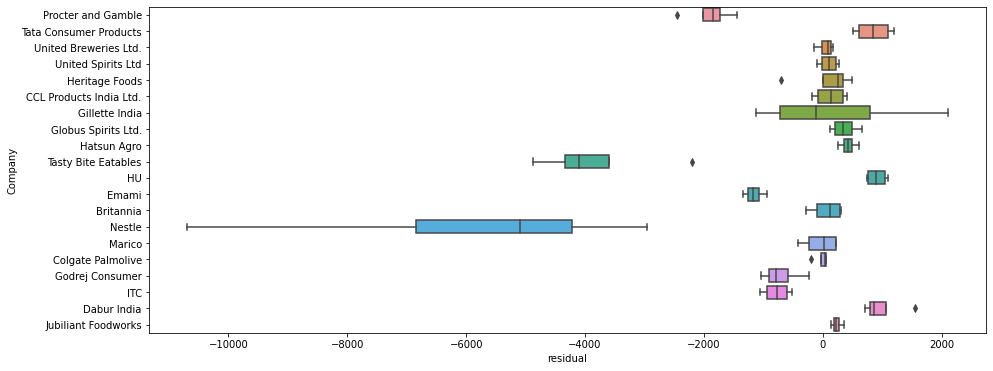

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_df, x = 'residual', y = 'Company');

### Saving the model

In [30]:
class StockPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [31]:
my_model = StockPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [32]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [33]:
from joblib import dump

In [34]:
dump(my_model, './stockprice.pkl')

['./stockprice.pkl']